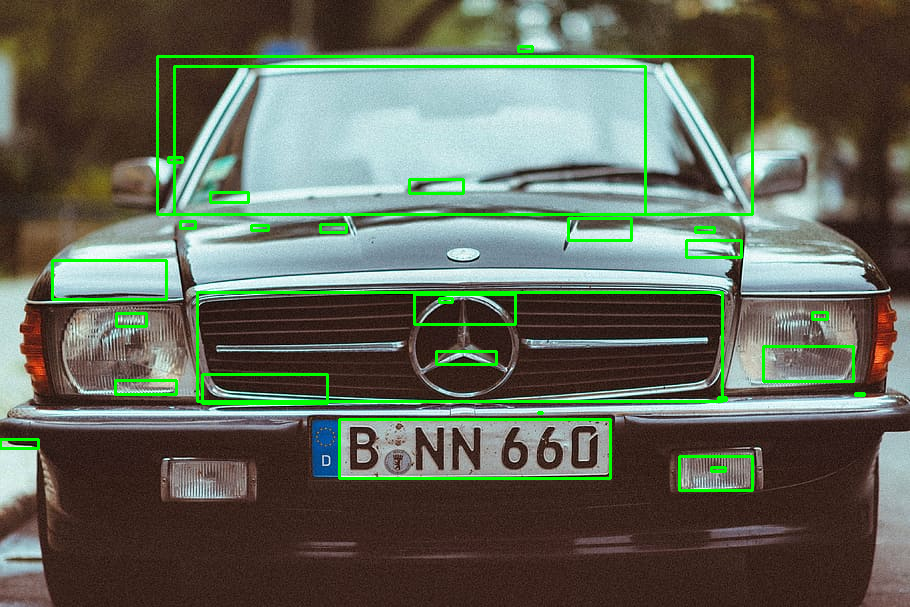

In [2]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow # Import the cv2_imshow function

# Load the image
image = cv2.imread('/content/sample_data/car-11.jpg')  # Replace 'car.jpg' with your image file

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Use Canny edge detection
edges = cv2.Canny(blurred, 100, 200)

# Find contours in the edge-detected image
contours, _ = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Iterate through contours to find potential number plate region
for contour in contours:
    # Get the bounding box for each contour
    x, y, w, h = cv2.boundingRect(contour)

    # Check if the aspect ratio of the bounding box is roughly the same as a typical number plate
    aspect_ratio = w / h
    if 2.0 < aspect_ratio < 5.0:  # Adjust these values based on your use case
        # Draw the bounding box around the detected number plate
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Show the image with the detected number plate
cv2_imshow(image) # Use cv2_imshow instead of cv2.imshow
cv2.waitKey(0)
cv2.destroyAllWindows()